#  Bike Sharing Assignment

## Step 1: Reading & Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pwd

'C:\\Users\\MSCB\\Desktop\\UPGRAD\\Course 2 - Machine Learning'

In [4]:
import os
print(os.getcwd())

C:\Users\MSCB\Desktop\UPGRAD\Course 2 - Machine Learning


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment Batch-1.zip',
 'Bike_Sharing_Assignment-checkpoint_Naresh_updated.ipynb',
 'Kaggle-Bike-Sharing-Demand-master',
 'Kaggle-Bike-Sharing-Demand-master.zip',
 'Module 1 - Simple Linear Regression',
 'Untitled.ipynb']

In [6]:
day = pd.read_csv('Module 1 - Simple Linear Regression\\Linear Regression Assignment\\day.csv')
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
day.shape

(730, 16)

In [10]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Identifying categorical and continuos values in the dataframe


In [11]:
day.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

### We get the following
### Categorical Variables : yr, holiday, workingday, weathersit, season, weekday, mnth 
### Continuos Variables : temp, hum, casual, windspeed, registered, atemp, cnt, instant, dteday

In [12]:
# dropping unnecesary columns
day.drop(columns = ['instant','dteday', 'casual', 'registered','temp'], inplace=True)

In [13]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [14]:
# checking the datatypes 
day.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [15]:
# changing datatypes according to the data in columns
day.loc[:,['season','mnth','weekday','weathersit']] = day.loc[:,['season','mnth','weekday','weathersit']].astype(object)


In [16]:
day.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [17]:
# Mapping the respective categories for columns season, mnth, weekday, weathersit to get dummies later
day['season']= day['season'].map({1:'spring',2 :'summer',3 : 'fall', 4 : 'winter'})
day['mnth'] = day['mnth'].map({1 :'january',2:'febraury',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})
day['weekday'] = day['weekday'].map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})
day['weathersit'] = day['weathersit'].map({1:'Clear',2:'Mist + Cloudy',3:'Light Rain and Snow',4:'Heavy Rain and Snow'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

### Numerical Variables

## EDA on Columns
### Univariate Analysis

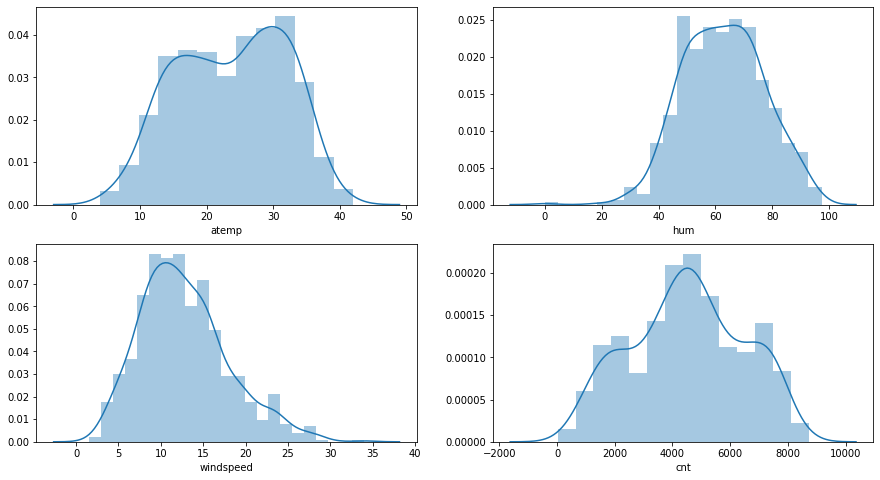

In [18]:
# checking the distribution of cnt column
fig,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.distplot(day['atemp'], hist = True)
plt.subplot(2,2,2)
sns.distplot(day['hum'], hist = True)
plt.subplot(2,2,3)
sns.distplot(day['windspeed'], hist = True)
plt.subplot(2,2,4)
sns.distplot(day['cnt'], hist = True)
fig.set_size_inches(15,8)

`Observation:`
1. `atemp`: temperature is distributed around 15 to 30 
2. `hum`: Humidity is distributed around 50 to 70
3. `windspeed`: windspeed is distributed around 10 to 15
4. `cnt`: Most users are distributed in range 3000 to 6000

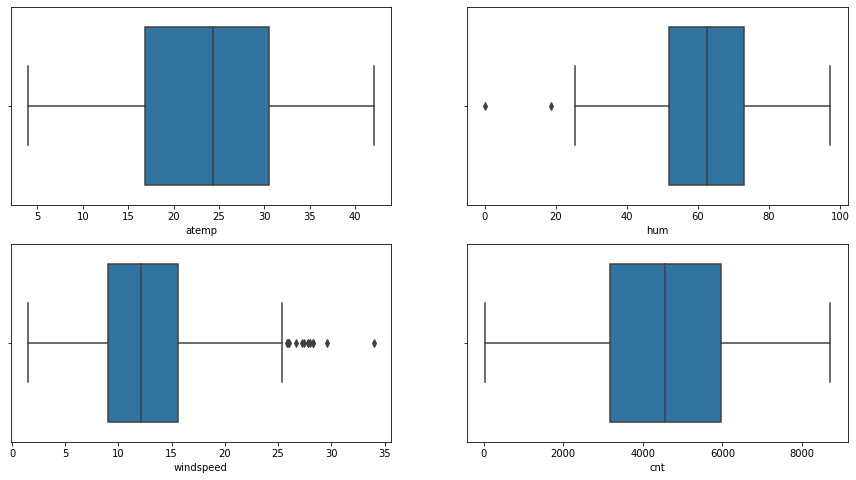

In [19]:
fig,ax = plt.subplots(2,2)
plt.subplot(2,2,1)
sns.boxplot(day['atemp'])
plt.subplot(2,2,2)
sns.boxplot(day['hum'])
plt.subplot(2,2,3)
sns.boxplot(day['windspeed'])
plt.subplot(2,2,4)
sns.boxplot(day['cnt'])
fig.set_size_inches(15,8)

`observation:`
1. `atemp`: Range of temperature is around 15 to 30  degree celcius.No extreme/outliers temperatures.
2. `hum`: distribution of humidity is around 50 to 70. Some Extreme/outliers values are at 0 and 20.
3. `windspeed`: Distribution of data is around 10 to 15. Some Extreme/outliers values are above 25.
4. `cnt`: Distribution of values are around 3000 to 6000. No Extreme/outliers values

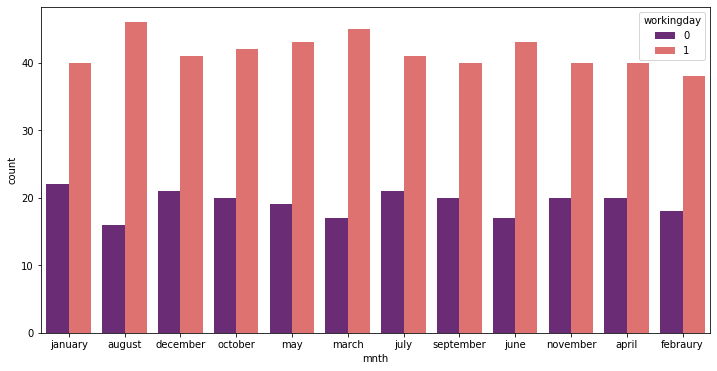

In [20]:
fig,ax=plt.subplots(1,1)
ax = sns.countplot(data = day, x= 'mnth', order=day['mnth'].value_counts().index, hue = 'workingday', palette='magma') 
fig.set_size_inches(12,6)

`observation:`
1. Most no.of Working days are in august and least no. of working days are in january

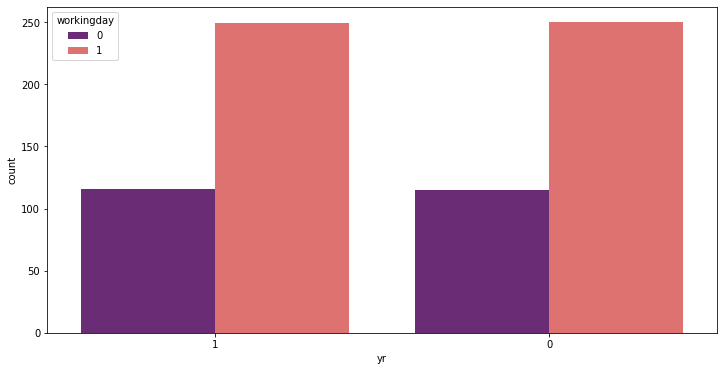

In [21]:
fig,ax=plt.subplots(1,1)
ax = sns.countplot(data = day, x= 'yr', order=day['yr'].value_counts().index, hue = 'workingday', palette='magma') 
fig.set_size_inches(12,6)

`observation:`
1. Almost same working days in the year 2018 and 2019.

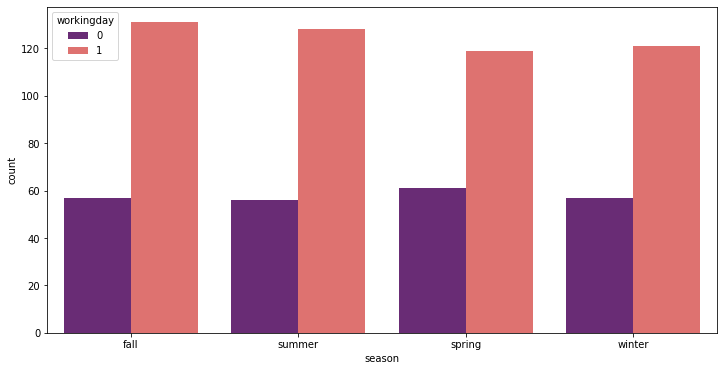

In [22]:
fig,ax=plt.subplots(1,1)
ax = sns.countplot(data = day, x= 'season', order=day['season'].value_counts().index, hue = 'workingday', palette='magma') 
fig.set_size_inches(12,6)

`observation`:
1. less working days are there in spring season and more working days are in fall season.

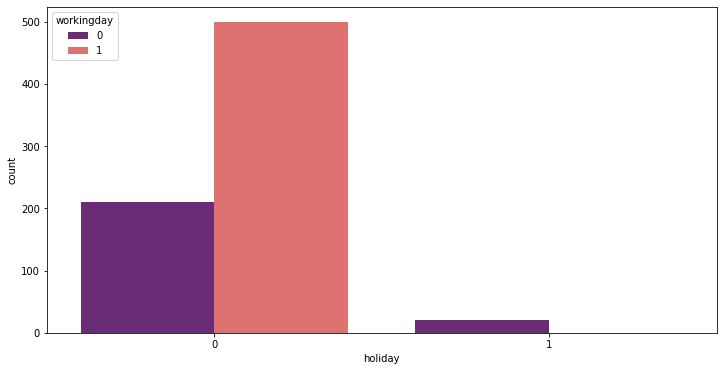

In [23]:
fig,ax=plt.subplots(1,1)
ax = sns.countplot(data = day, x= 'holiday', order=day['holiday'].value_counts().index, hue = 'workingday', palette='magma') 
fig.set_size_inches(12,6)

`observation`:
1. Around 200 there are non working days without a holiday. This may cause dip in revenue.
2. Observing plot there are less number of holidays count.

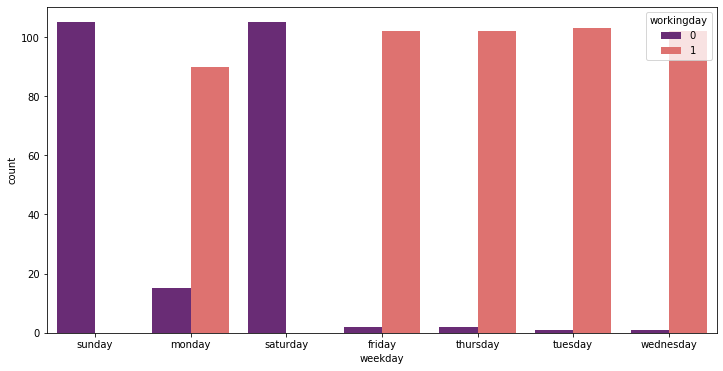

In [24]:
fig,ax=plt.subplots(1,1)
ax = sns.countplot(data = day, x= 'weekday', order=day['weekday'].value_counts().index, hue = 'workingday', palette='magma') 
fig.set_size_inches(12,6)

`observation`:
1. Monday's have most number of non working days. Generally all saturday's and sunday's are non working days. 

## Bivariate analysis

,mnth,cnt
0,april,269094
1,august,351194
2,december,211036
3,febraury,149518
4,january,134933
5,july,344948
6,june,346342
7,march,228920
8,may,331686
9,november,254831


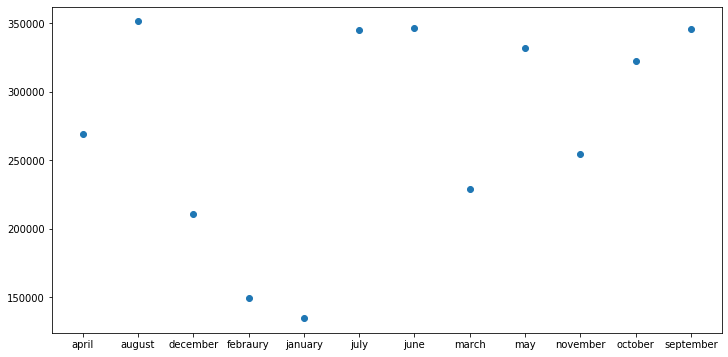

In [25]:
# Plotting the total count of users month wise
month_count = day.groupby(['mnth'])['cnt'].sum().reset_index()
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
plt.scatter(month_count['mnth'], month_count["cnt"])
month_count

`observation`:
1. Most of the users are in june,july,august,september months.
2. least user rental count are in january,febraury months

,season,cnt
0,fall,1061129
1,spring,469514
2,summer,918589
3,winter,841613


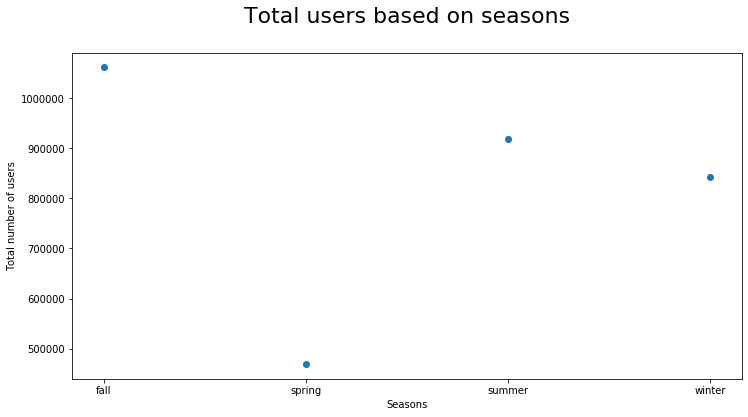

In [26]:
# Plotting the total count of users season wise
season_count = day.groupby(['season'])['cnt'].sum().reset_index()
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xlabel('Seasons')
plt.ylabel('Total number of users')
plt.title("Total users based on seasons")

plt.scatter(season_count['season'], season_count["cnt"])
season_count

`observation`:
1. Most users are in fall season
2. least users are in spring season

,yr,cnt
0,0,1243103
1,1,2047742


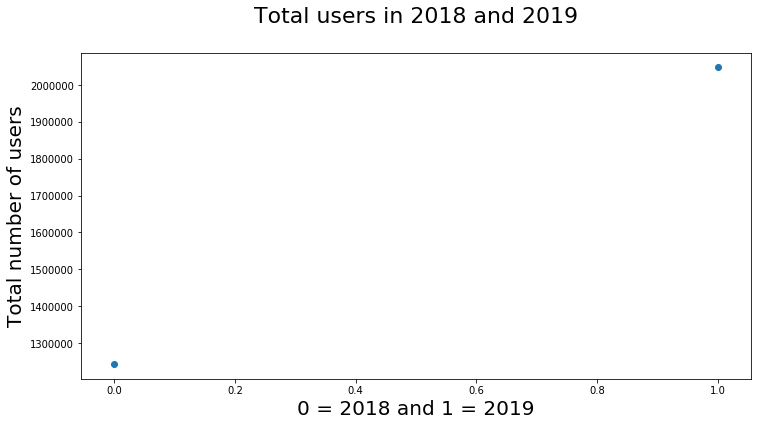

In [27]:
# Plotting the total count of users year wise
year_count = day.groupby(['yr'])['cnt'].sum().reset_index()
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xlabel('0 = 2018 and 1 = 2019')
plt.ylabel('Total number of users')
plt.title("Total users in 2018 and 2019")
plt.scatter(year_count['yr'], year_count["cnt"])
year_count

`observation`: 
1. comparing 2018 and 2019 users we can see that there is a increase of 8lakh users from 2018 to 2019

,weathersit,cnt
0,Clear,2257952
1,Light Rain and Snow,37869
2,Mist + Cloudy,995024


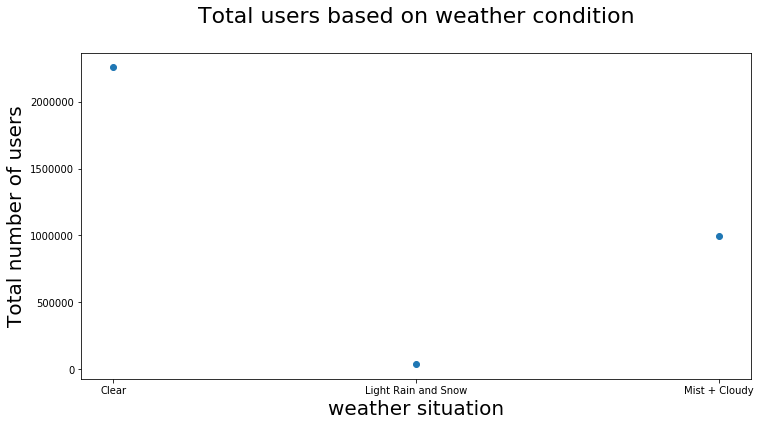

In [28]:
# Plotting the total count of users according to weather
weather_count = day.groupby(['weathersit'])['cnt'].sum().reset_index()
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xlabel('weather situation')
plt.ylabel('Total number of users')
plt.title("Total users based on weather condition")

plt.scatter(weather_count['weathersit'], weather_count["cnt"])
weather_count

`observation`:
1. Clear weather condition has most number of users.
2. Light rain and snow causes less number of users.
3. moderate number of users are available in mist and cloudy weather condition.

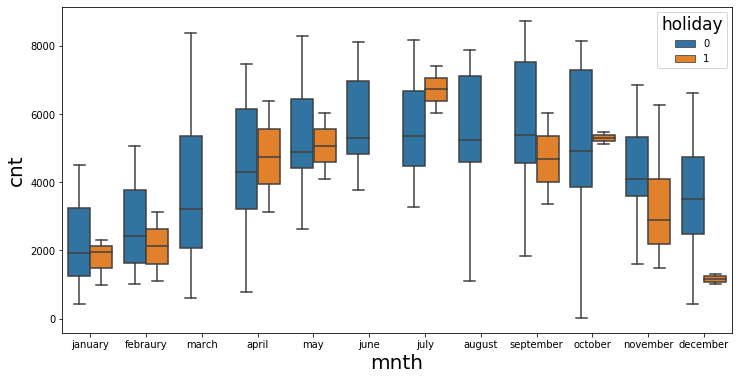

In [29]:
# bivariate analysis between month and user count according to holidays
fig,ax = plt.subplots()
sns.boxplot(data =day, x='mnth',y='cnt', hue ='holiday',orient='v')
fig.set_size_inches(12,6)

`observation`:
1. Most users are in june, july, august, september with holidays in july and september.

### Corelation between variables

In [30]:
corr_data = day.corr()
corr_data

,yr,holiday,workingday,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.052940,0.023202,-0.018666,0.062542
atemp,0.047215,-0.032703,0.052940,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.630685,-0.098543,-0.235132,1.000000


In [31]:
# visualizing the correlation data using heatmap
def Correlation(data,title):
    # creating figure size
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    # Using color of red, yellow,green in Heatmap.
    sns.heatmap(data, cmap="YlGnBu",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

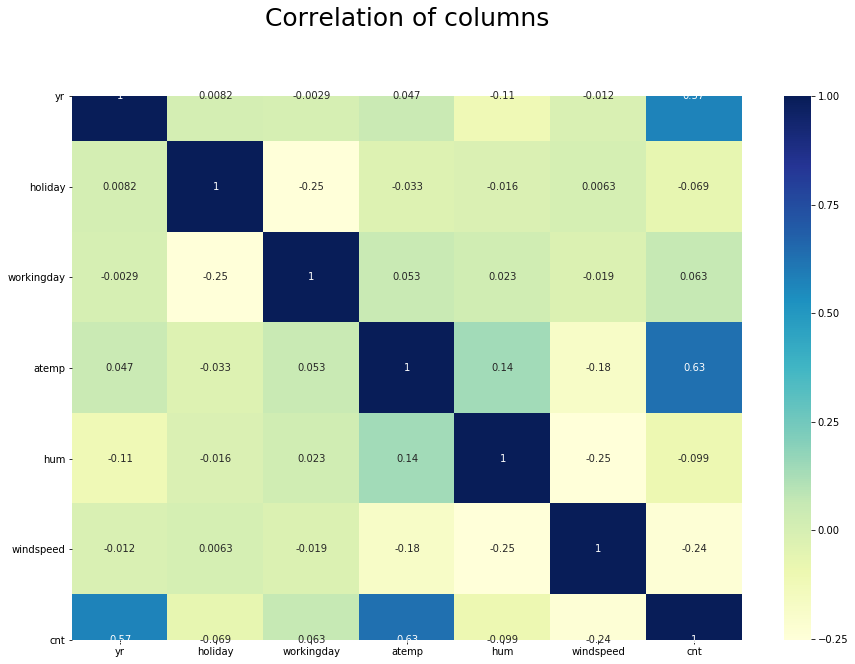

In [32]:
Correlation(corr_data,title='Correlation of columns')

In [33]:
corr1 = corr_data.where(np.triu(np.ones(corr_data.shape) , k=1).astype(bool))
corrdf1=corr1.unstack().reset_index()
corrdf1.columns = ['Column1','Column2','Correlation']
corrdf1.dropna(subset = ['Correlation'],inplace=True)
corrdf1.Correlation = round(corrdf1.Correlation,2)
corrdf1['Correlation_abs'] = corrdf1.Correlation.abs()
corrdf1.sort_values(by = 'Correlation_abs',ascending = False)

,Column1,Column2,Correlation,Correlation_abs
45,cnt,atemp,0.63,0.63
42,cnt,yr,0.57,0.57
15,workingday,holiday,-0.25,0.25
39,windspeed,hum,-0.25,0.25
47,cnt,windspeed,-0.24,0.24
38,windspeed,atemp,-0.18,0.18
31,hum,atemp,0.14,0.14
28,hum,yr,-0.11,0.11
46,cnt,hum,-0.10,0.10
43,cnt,holiday,-0.07,0.07


### Creating Dummy Variables

In [34]:
day = pd.get_dummies(day,drop_first = True)
day.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 3: Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
# Rescaling the variables
#importing the required library
from sklearn.preprocessing import MinMaxScaler

In [37]:
#instansiating the object
scaler = MinMaxScaler()

In [38]:
df_train

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
653,1,0,1,23.04230,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.14480,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.67460,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.87520,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,32.98605,58.7917,13.916771,6664,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,35.35440,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,12.28585,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,12.46855,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [39]:
# Apply scaler() to all the identified columns 
num_vars = ['cnt','atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


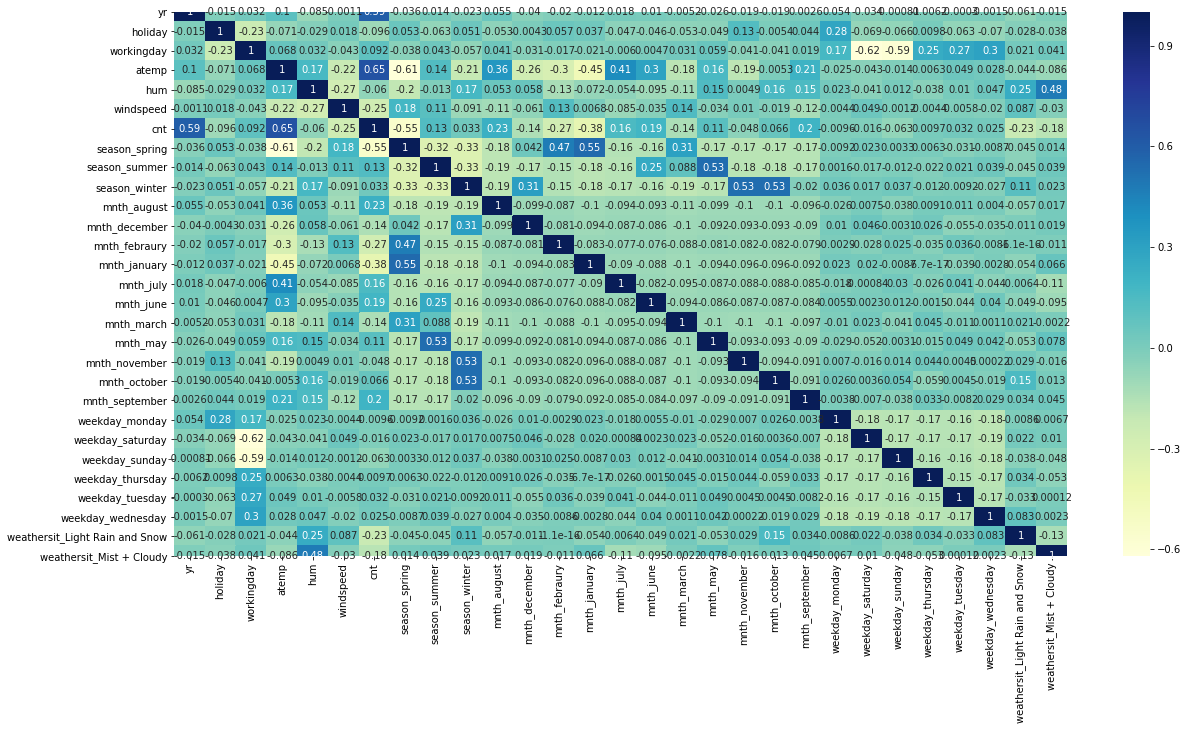

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# RFE
#### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)       # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', True, 1),
 ('mnth_december', True, 1),
 ('mnth_febraury', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 2),
 ('mnth_march', False, 9),
 ('mnth_may', True, 1),
 ('mnth_november', True, 1),
 ('mnth_october', False, 7),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 4),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 3),
 ('weekday_thursday', False, 6),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 8),
 ('weathersit_Light Rain and Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [46]:
# chosing the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_febraury', 'mnth_january', 'mnth_july',
       'mnth_may', 'mnth_november', 'mnth_september', 'weekday_saturday',
       'weathersit_Light Rain and Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['mnth_june', 'mnth_march', 'mnth_october', 'weekday_monday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [48]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.89e-186
Time:                        00:52:13   Log-Likelihood:                 521.45
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -912.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3119      0.040      7.730      0.000       0.233       0.391
yr                                 0.2329      0.008     29.027      0.000       0.217       0.249
holiday                           -0.0442      0.027     -1.630      0.104      -0.098       0.009
workingday                         0.0444      0.012      3.850      0.000       0.022       0.067
atemp                              0.4366      0.039     11.180      0.000       0.360       0.513
hum                               -0.1520      0.038     -4.000      0.000      -0.227      -0.077
windspeed                         -0.1707      0.026     -6.643      0.000      -0.221      -0.120
season_spring                     -0.0630      0.026     -2.388      0.017      -0.115      -0.011
season_summer                      0.0237      0.023      1.024      0.306      -0.022       0.069
season_winter                      0.0951      0.022      4.235      0.000       0.051       0.139
mnth_august                        0.0223      0.024      0.940      0.348      -0.024       0.069
mnth_december                     -0.0563      0.018     -3.101      0.002      -0.092      -0.021
mnth_febraury                     -0.0400      0.022     -1.858      0.064      -0.082       0.002
mnth_january                      -0.0716      0.021     -3.361      0.001      -0.113      -0.030
mnth_july                         -0.0369      0.025     -1.491      0.137      -0.086       0.012
mnth_may                           0.0301      0.017      1.731      0.084      -0.004       0.064
mnth_november                     -0.0524      0.019     -2.783      0.006      -0.089      -0.015
mnth_september                     0.0794      0.022      3.680      0.000       0.037       0.122
weekday_saturday                   0.0545      0.015      3.738      0.000       0.026       0.083
weathersit_Light Rain and Snow    -0.2528      0.026     -9.572      0.000      -0.305      -0.201
weathersit_Mist + Cloudy          -0.0612      0.010     -5.867      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       82.745   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.732
Skew:                          -0.752   Prob(JB):                     1.78e-56
Kurtosis:                       6.134   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.15
3,atemp,21.17
6,season_spring,7.39
8,season_winter,5.96
7,season_summer,5.90
2,workingday,5.44
5,windspeed,4.83
9,mnth_august,3.09
13,mnth_july,2.75
12,mnth_january,2.42


### Dropping variable based on Significance (p-Value) & VIF

#### We could have:
##### 1. High p-value, High VIF
##### 2. High - Low: 
##### a. High p-value, Low VIF - Remove these first
##### b. Low p-value, High VIF - Remove the after the ones above
##### 3. Low p-value, Low VIF

In [55]:
# removing the mnth_august feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_august'], axis=1)

In [56]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model2
#Let's see the summary of our linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.39e-187
Time:                        00:55:32   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3248      0.038      8.562      0.000       0.250       0.399
yr                                 0.2332      0.008     29.078      0.000       0.217       0.249
holiday                           -0.0446      0.027     -1.641      0.101      -0.098       0.009
workingday                         0.0446      0.012      3.869      0.000       0.022       0.067
atemp                              0.4384      0.039     11.239      0.000       0.362       0.515
hum                               -0.1502      0.038     -3.957      0.000      -0.225      -0.076
windspeed                         -0.1709      0.026     -6.651      0.000      -0.221      -0.120
season_spring                     -0.0776      0.021     -3.648      0.000      -0.119      -0.036
season_summer                      0.0084      0.016      0.511      0.610      -0.024       0.041
season_winter                      0.0816      0.017      4.735      0.000       0.048       0.115
mnth_december                     -0.0575      0.018     -3.180      0.002      -0.093      -0.022
mnth_febraury                     -0.0401      0.022     -1.863      0.063      -0.082       0.002
mnth_january                      -0.0718      0.021     -3.371      0.001      -0.114      -0.030
mnth_july                         -0.0527      0.018     -2.905      0.004      -0.088      -0.017
mnth_may                           0.0297      0.017      1.708      0.088      -0.004       0.064
mnth_november                     -0.0540      0.019     -2.876      0.004      -0.091      -0.017
mnth_september                     0.0666      0.017      3.981      0.000       0.034       0.099
weekday_saturday                   0.0551      0.015      3.790      0.000       0.027       0.084
weathersit_Light Rain and Snow    -0.2541      0.026     -9.636      0.000      -0.306      -0.202
weathersit_Mist + Cloudy          -0.0609      0.010     -5.841      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       84.032   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.302
Skew:                          -0.762   Prob(JB):                     1.10e-57
Kurtosis:                       6.166   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.21
3,atemp,19.28
6,season_spring,5.44
2,workingday,5.36
5,windspeed,4.74
8,season_winter,3.97
7,season_summer,3.34
11,mnth_january,2.40
18,weathersit_Mist + Cloudy,2.32
0,yr,2.09


In [58]:
# removing the season_summer feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['season_summer'], axis=1)

In [59]:
lm3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model3
#Let's see the summary of our linear model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.17e-188
Time:                        00:56:58   Log-Likelihood:                 520.86
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3339      0.033      9.982      0.000       0.268       0.400
yr                                 0.2334      0.008     29.160      0.000       0.218       0.249
holiday                           -0.0443      0.027     -1.635      0.103      -0.098       0.009
workingday                         0.0446      0.012      3.867      0.000       0.022       0.067
atemp                              0.4297      0.035     12.258      0.000       0.361       0.499
hum                               -0.1495      0.038     -3.944      0.000      -0.224      -0.075
windspeed                         -0.1696      0.026     -6.639      0.000      -0.220      -0.119
season_spring                     -0.0840      0.017     -4.866      0.000      -0.118      -0.050
season_winter                      0.0766      0.014      5.392      0.000       0.049       0.104
mnth_december                     -0.0592      0.018     -3.332      0.001      -0.094      -0.024
mnth_febraury                     -0.0414      0.021     -1.939      0.053      -0.083       0.001
mnth_january                      -0.0737      0.021     -3.509      0.000      -0.115      -0.032
mnth_july                         -0.0555      0.017     -3.221      0.001      -0.089      -0.022
mnth_may                           0.0336      0.016      2.148      0.032       0.003       0.064
mnth_november                     -0.0556      0.018     -3.015      0.003      -0.092      -0.019
mnth_september                     0.0635      0.016      4.073      0.000       0.033       0.094
weekday_saturday                   0.0551      0.015      3.793      0.000       0.027       0.084
weathersit_Light Rain and Snow    -0.2547      0.026     -9.678      0.000      -0.306      -0.203
weathersit_Mist + Cloudy          -0.0611      0.010     -5.866      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.804   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.501
Skew:                          -0.766   Prob(JB):                     8.18e-59
Kurtosis:                       6.200   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.37
3,atemp,18.36
2,workingday,5.25
6,season_spring,4.28
5,windspeed,4.15
7,season_winter,3.12
10,mnth_january,2.39
17,weathersit_Mist + Cloudy,2.27
0,yr,2.07
15,weekday_saturday,1.97


In [61]:
# removing the hum feature as it is having high VIF
X_train_rfe=X_train_rfe.drop(['hum'], axis=1)

In [62]:
lm4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model4
#Let's see the summary of our linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.45e-186
Time:                        00:58:18   Log-Likelihood:                 512.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     492   BIC:                            -913.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2573      0.028      9.309      0.000       0.203       0.312
yr                                 0.2368      0.008     29.322      0.000       0.221       0.253
holiday                           -0.0427      0.028     -1.552      0.121      -0.097       0.011
workingday                         0.0476      0.012      4.074      0.000       0.025       0.071
atemp                              0.3941      0.034     11.467      0.000       0.327       0.462
windspeed                         -0.1449      0.025     -5.766      0.000      -0.194      -0.096
season_spring                     -0.0879      0.017     -5.031      0.000      -0.122      -0.054
season_winter                      0.0664      0.014      4.684      0.000       0.039       0.094
mnth_december                     -0.0657      0.018     -3.656      0.000      -0.101      -0.030
mnth_febraury                     -0.0430      0.022     -1.987      0.047      -0.086      -0.000
mnth_january                      -0.0800      0.021     -3.768      0.000      -0.122      -0.038
mnth_july                         -0.0497      0.017     -2.851      0.005      -0.084      -0.015
mnth_may                           0.0240      0.016      1.529      0.127      -0.007       0.055
mnth_november                     -0.0556      0.019     -2.969      0.003      -0.092      -0.019
mnth_september                     0.0584      0.016      3.704      0.000       0.027       0.089
weekday_saturday                   0.0596      0.015      4.056      0.000       0.031       0.089
weathersit_Light Rain and Snow    -0.2972      0.024    -12.195      0.000      -0.345      -0.249
weathersit_Mist + Cloudy          -0.0847      0.009     -9.805      0.000      -0.102      -0.068
==============================================================================
Omnibus:                       88.180   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.891
Skew:                          -0.803   Prob(JB):                     5.53e-60
Kurtosis:                       6.203   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.31
2,workingday,5.13
4,windspeed,4.13
5,season_spring,3.92
6,season_winter,2.69
9,mnth_january,2.24
0,yr,2.07
14,weekday_saturday,1.95
8,mnth_febraury,1.89
12,mnth_november,1.83


In [64]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_may'], axis=1)

In [65]:
lm5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 5
#Let's see the summary of our linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.39e-187
Time:                        00:59:14   Log-Likelihood:                 511.69
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     493   BIC:                            -917.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2632      0.027      9.599      0.000       0.209       0.317
yr                                 0.2362      0.008     29.242      0.000       0.220       0.252
holiday                           -0.0434      0.028     -1.575      0.116      -0.098       0.011
workingday                         0.0475      0.012      4.064      0.000       0.025       0.070
atemp                              0.3943      0.034     11.456      0.000       0.327       0.462
windspeed                         -0.1464      0.025     -5.820      0.000      -0.196      -0.097
season_spring                     -0.0928      0.017     -5.396      0.000      -0.127      -0.059
season_winter                      0.0617      0.014      4.454      0.000       0.035       0.089
mnth_december                     -0.0663      0.018     -3.686      0.000      -0.102      -0.031
mnth_febraury                     -0.0432      0.022     -1.995      0.047      -0.086      -0.001
mnth_january                      -0.0804      0.021     -3.783      0.000      -0.122      -0.039
mnth_july                         -0.0549      0.017     -3.208      0.001      -0.089      -0.021
mnth_november                     -0.0562      0.019     -2.996      0.003      -0.093      -0.019
mnth_september                     0.0540      0.016      3.478      0.001       0.023       0.084
weekday_saturday                   0.0588      0.015      3.998      0.000       0.030       0.088
weathersit_Light Rain and Snow    -0.2979      0.024    -12.210      0.000      -0.346      -0.250
weathersit_Mist + Cloudy          -0.0837      0.009     -9.704      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       86.007   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.078
Skew:                          -0.799   Prob(JB):                     6.73e-56
Kurtosis:                       6.067   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.00
2,workingday,5.12
4,windspeed,4.12
5,season_spring,3.84
6,season_winter,2.61
9,mnth_january,2.24
0,yr,2.07
13,weekday_saturday,1.95
8,mnth_febraury,1.89
11,mnth_november,1.83


In [67]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['holiday'], axis=1)

In [68]:
lm6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 6
#Let's see the summary of our linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.12e-187
Time:                        01:00:32   Log-Likelihood:                 510.41
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     494   BIC:                            -921.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2581      0.027      9.466      0.000       0.205       0.312
yr                                 0.2363      0.008     29.218      0.000       0.220       0.252
workingday                         0.0539      0.011      4.902      0.000       0.032       0.075
atemp                              0.3930      0.034     11.406      0.000       0.325       0.461
windspeed                         -0.1470      0.025     -5.838      0.000      -0.196      -0.098
season_spring                     -0.0933      0.017     -5.415      0.000      -0.127      -0.059
season_winter                      0.0621      0.014      4.476      0.000       0.035       0.089
mnth_december                     -0.0673      0.018     -3.741      0.000      -0.103      -0.032
mnth_febraury                     -0.0448      0.022     -2.064      0.040      -0.087      -0.002
mnth_january                      -0.0819      0.021     -3.848      0.000      -0.124      -0.040
mnth_july                         -0.0541      0.017     -3.155      0.002      -0.088      -0.020
mnth_november                     -0.0597      0.019     -3.206      0.001      -0.096      -0.023
mnth_september                     0.0521      0.016      3.363      0.001       0.022       0.083
weekday_saturday                   0.0652      0.014      4.600      0.000       0.037       0.093
weathersit_Light Rain and Snow    -0.2973      0.024    -12.169      0.000      -0.345      -0.249
weathersit_Mist + Cloudy          -0.0834      0.009     -9.652      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       91.295   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.213
Skew:                          -0.837   Prob(JB):                     3.86e-61
Kurtosis:                       6.208   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.67
1,workingday,4.57
3,windspeed,4.10
4,season_spring,3.82
5,season_winter,2.60
8,mnth_january,2.22
0,yr,2.07
7,mnth_febraury,1.88
12,weekday_saturday,1.82
10,mnth_november,1.79


In [70]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_febraury'], axis=1)

In [71]:
lm7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 7
#Let's see the summary of our linear model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.25e-187
Time:                        01:01:24   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2467      0.027      9.209      0.000       0.194       0.299
yr                                 0.2360      0.008     29.092      0.000       0.220       0.252
workingday                         0.0545      0.011      4.947      0.000       0.033       0.076
atemp                              0.4088      0.034     12.128      0.000       0.343       0.475
windspeed                         -0.1441      0.025     -5.712      0.000      -0.194      -0.095
season_spring                     -0.1097      0.015     -7.165      0.000      -0.140      -0.080
season_winter                      0.0611      0.014      4.389      0.000       0.034       0.088
mnth_december                     -0.0568      0.017     -3.281      0.001      -0.091      -0.023
mnth_january                      -0.0587      0.018     -3.237      0.001      -0.094      -0.023
mnth_july                         -0.0568      0.017     -3.311      0.001      -0.090      -0.023
mnth_november                     -0.0548      0.019     -2.954      0.003      -0.091      -0.018
mnth_september                     0.0521      0.016      3.348      0.001       0.022       0.083
weekday_saturday                   0.0667      0.014      4.695      0.000       0.039       0.095
weathersit_Light Rain and Snow    -0.2964      0.025    -12.094      0.000      -0.345      -0.248
weathersit_Mist + Cloudy          -0.0834      0.009     -9.624      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       85.682   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.500
Skew:                          -0.787   Prob(JB):                     4.47e-57
Kurtosis:                       6.120   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.60
1,workingday,4.57
3,windspeed,4.09
5,season_winter,2.57
4,season_spring,2.43
0,yr,2.06
11,weekday_saturday,1.82
9,mnth_november,1.77
7,mnth_january,1.67
13,weathersit_Mist + Cloudy,1.56


In [73]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['windspeed'], axis=1)

In [74]:
lm8 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 8
#Let's see the summary of our linear model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.05e-182
Time:                        01:02:06   Log-Likelihood:                 491.95
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     496   BIC:                            -896.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1761      0.025      7.184      0.000       0.128       0.224
yr                                 0.2346      0.008     28.044      0.000       0.218       0.251
workingday                         0.0553      0.011      4.863      0.000       0.033       0.078
atemp                              0.4475      0.034     13.139      0.000       0.381       0.514
season_spring                     -0.1114      0.016     -7.051      0.000      -0.142      -0.080
season_winter                      0.0700      0.014      4.912      0.000       0.042       0.098
mnth_december                     -0.0456      0.018     -2.568      0.011      -0.080      -0.011
mnth_january                      -0.0411      0.018     -2.229      0.026      -0.077      -0.005
mnth_july                         -0.0558      0.018     -3.156      0.002      -0.091      -0.021
mnth_november                     -0.0543      0.019     -2.842      0.005      -0.092      -0.017
mnth_september                     0.0596      0.016      3.728      0.000       0.028       0.091
weekday_saturday                   0.0642      0.015      4.385      0.000       0.035       0.093
weathersit_Light Rain and Snow    -0.3079      0.025    -12.224      0.000      -0.357      -0.258
weathersit_Mist + Cloudy          -0.0820      0.009     -9.180      0.000      -0.100      -0.064
==============================================================================
Omnibus:                       88.406   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.250
Skew:                          -0.786   Prob(JB):                     9.40e-64
Kurtosis:                       6.345   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.67
1,workingday,4.45
4,season_winter,2.55
3,season_spring,2.09
0,yr,2.05
10,weekday_saturday,1.77
8,mnth_november,1.76
6,mnth_january,1.66
12,weathersit_Mist + Cloudy,1.55
5,mnth_december,1.48


In [76]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_january'], axis=1)

In [77]:
lm9 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 9
#Let's see the summary of our linear model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.88e-182
Time:                        01:03:00   Log-Likelihood:                 489.41
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     497   BIC:                            -897.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1642      0.024      6.836      0.000       0.117       0.211
yr                                 0.2340      0.008     27.879      0.000       0.218       0.250
workingday                         0.0550      0.011      4.818      0.000       0.033       0.077
atemp                              0.4677      0.033     14.189      0.000       0.403       0.532
season_spring                     -0.1203      0.015     -7.838      0.000      -0.150      -0.090
season_winter                      0.0702      0.014      4.904      0.000       0.042       0.098
mnth_december                     -0.0370      0.017     -2.128      0.034      -0.071      -0.003
mnth_july                         -0.0598      0.018     -3.383      0.001      -0.094      -0.025
mnth_november                     -0.0498      0.019     -2.608      0.009      -0.087      -0.012
mnth_september                     0.0588      0.016      3.666      0.000       0.027       0.090
weekday_saturday                   0.0638      0.015      4.340      0.000       0.035       0.093
weathersit_Light Rain and Snow    -0.3046      0.025    -12.064      0.000      -0.354      -0.255
weathersit_Mist + Cloudy          -0.0829      0.009     -9.249      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       84.200   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.351
Skew:                          -0.748   Prob(JB):                     1.62e-60
Kurtosis:                       6.274   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.53
1,workingday,4.40
4,season_winter,2.54
0,yr,2.05
9,weekday_saturday,1.76
7,mnth_november,1.75
11,weathersit_Mist + Cloudy,1.54
3,season_spring,1.52
5,mnth_december,1.43
6,mnth_july,1.34


In [79]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_december'], axis=1)

In [80]:
lm10 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 10
#Let's see the summary of our linear model
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.05e-182
Time:                        01:03:39   Log-Likelihood:                 487.09
No. Observations:                 510   AIC:                            -950.2
Df Residuals:                     498   BIC:                            -899.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1553      0.024      6.542      0.000       0.109       0.202
yr                                 0.2343      0.008     27.819      0.000       0.218       0.251
workingday                         0.0545      0.011      4.760      0.000       0.032       0.077
atemp                              0.4814      0.032     14.838      0.000       0.418       0.545
season_spring                     -0.1190      0.015     -7.735      0.000      -0.149      -0.089
season_winter                      0.0590      0.013      4.416      0.000       0.033       0.085
mnth_july                         -0.0618      0.018     -3.493      0.001      -0.097      -0.027
mnth_november                     -0.0350      0.018     -1.962      0.050      -0.070     5.3e-05
mnth_september                     0.0611      0.016      3.801      0.000       0.030       0.093
weekday_saturday                   0.0628      0.015      4.259      0.000       0.034       0.092
weathersit_Light Rain and Snow    -0.3003      0.025    -11.890      0.000      -0.350      -0.251
weathersit_Mist + Cloudy          -0.0823      0.009     -9.162      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       77.001   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.703   Prob(JB):                     7.72e-52
Kurtosis:                       6.016   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.48
1,workingday,4.37
0,yr,2.05
4,season_winter,1.97
8,weekday_saturday,1.74
6,mnth_november,1.55
10,weathersit_Mist + Cloudy,1.54
3,season_spring,1.50
5,mnth_july,1.34
7,mnth_september,1.19


In [82]:
# removing the hum feature as it is having high p value
X_train_rfe=X_train_rfe.drop(['mnth_november'], axis=1)

In [83]:
lm11 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model 11
#Let's see the summary of our linear model
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.30e-182
Time:                        01:04:26   Log-Likelihood:                 485.13
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     499   BIC:                            -901.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1487      0.024      6.311      0.000       0.102       0.195
yr                                 0.2343      0.008     27.738      0.000       0.218       0.251
workingday                         0.0552      0.011      4.812      0.000       0.033       0.078
atemp                              0.4896      0.032     15.178      0.000       0.426       0.553
season_spring                     -0.1158      0.015     -7.547      0.000      -0.146      -0.086
season_winter                      0.0486      0.012      3.952      0.000       0.024       0.073
mnth_july                         -0.0628      0.018     -3.540      0.000      -0.098      -0.028
mnth_september                     0.0633      0.016      3.942      0.000       0.032       0.095
weekday_saturday                   0.0641      0.015      4.341      0.000       0.035       0.093
weathersit_Light Rain and Snow    -0.2981      0.025    -11.781      0.000      -0.348      -0.248
weathersit_Mist + Cloudy          -0.0816      0.009     -9.059      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       74.585   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.705
Skew:                          -0.690   Prob(JB):                     7.20e-49
Kurtosis:                       5.921   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.48
1,workingday,4.36
0,yr,2.05
7,weekday_saturday,1.74
9,weathersit_Mist + Cloudy,1.54
3,season_spring,1.50
4,season_winter,1.40
5,mnth_july,1.34
6,mnth_september,1.18
8,weathersit_Light Rain and Snow,1.07


# Final Step: Residual Analysis on the Train data

In [86]:
y_train_pred = lm11.predict(X_train_rfe)

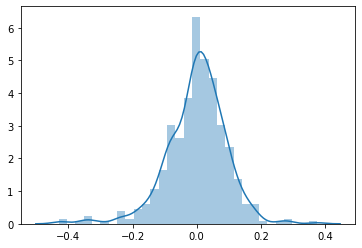

In [87]:
res = y_train - y_train_pred
sns.distplot(res)

Text(0.5, 0, 'Errors')

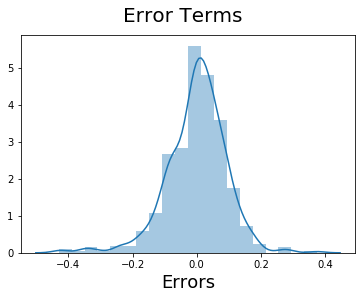

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions and Evaluations on the Test set

In [88]:
num_vars = ['cnt','atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain and Snow,weathersit_Mist + Cloudy
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [97]:
y_pred = lm11.predict(X_test_new)

In [98]:
lm12 = sm.OLS(y_test,X_test_new).fit()   # Running the linear model 12
#Let's see the summary of our linear model
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     96.51
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.83e-72
Time:                        01:22:29   Log-Likelihood:                 212.33
No. Observations:                 219   AIC:                            -402.7
Df Residuals:                     208   BIC:                            -365.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1942      0.038      5.171      0.000       0.120       0.268
yr                                 0.2418      0.013     18.609      0.000       0.216       0.267
workingday                         0.0366      0.017      2.137      0.034       0.003       0.070
atemp                              0.4412      0.053      8.313      0.000       0.337       0.546
season_spring                     -0.1522      0.025     -6.087      0.000      -0.202      -0.103
season_winter                      0.0498      0.020      2.504      0.013       0.011       0.089
mnth_july                         -0.0468      0.024     -1.913      0.057      -0.095       0.001
mnth_september                     0.0447      0.024      1.874      0.062      -0.002       0.092
weekday_saturday                   0.0513      0.024      2.153      0.033       0.004       0.098
weathersit_Light Rain and Snow    -0.2541      0.040     -6.326      0.000      -0.333      -0.175
weathersit_Mist + Cloudy          -0.0656      0.014     -4.706      0.000      -0.093      -0.038
==============================================================================
Omnibus:                       19.426   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.711
Skew:                          -0.619   Prob(JB):                     4.31e-06
Kurtosis:                       4.085   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

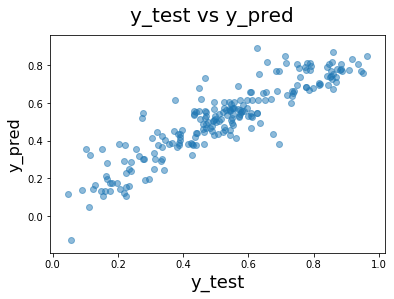

In [108]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [99]:
# Evaluate
from sklearn.metrics import r2_score

In [101]:
r2_score(y_true = y_test, y_pred = y_pred)

0.8154710193527561

# Final Result Comparison
### Train R^2 :0.823

### Test R^2 :0.815
## This seems to be a really good model that can very well 'Generalize' various datasets.